In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from IPython.display import Image
import pydotplus
import joblib

In [2]:
datos_train = pd.read_csv("datos/datos_postres.txt", sep=", ")
datos_test = pd.read_csv("datos/datos_test.txt", sep=", ")

label_cols = ['tipo', 'estacion', 'postre']
encoders = {}
for col in label_cols:
    enc = LabelEncoder()
    datos_train[col] = enc.fit_transform(datos_train[col])
    datos_test[col] = enc.fit_transform(datos_test[col])
    encoders[col] = enc

datos_train

C:\Users\chope\AppData\Local\Temp\ipykernel_14716\1154537339.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_train = pd.read_csv("datos/datos_postres.txt", sep=", ")
C:\Users\chope\AppData\Local\Temp\ipykernel_14716\1154537339.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_test = pd.read_csv("datos/datos_test.txt", sep=", ")


,tipo,hambre,cansancio,restaurante,celebracion,comido_platano,estacion,postre
0,0,1,0,0,0,1,2,2
1,1,1,0,0,0,1,2,4
2,0,2,0,0,0,1,2,2
3,1,1,0,0,0,1,2,7
4,0,0,1,0,0,1,2,10
...,...,...,...,...,...,...,...,...
341,0,2,0,0,0,1,1,3
342,0,1,0,0,0,1,1,3
343,0,2,1,0,0,1,1,3
344,0,1,0,0,0,1,1,3


In [3]:
print(f"tipos de respuestas datos train:\n{datos_train.nunique()}")
print(f"cantidad de nulls datos train:\n{datos_train.isnull().sum()}")
print(f"tipos de respuestas datos test:\n{datos_test.nunique()}")
print(f"cantidad de nulls datos test:\n{datos_test.isnull().sum()}")

tipos de respuestas datos train:
tipo               2
hambre             3
cansancio          3
restaurante        2
celebracion        2
comido_platano     2
estacion           4
postre            11
dtype: int64
cantidad de nulls datos train:
tipo              0
hambre            0
cansancio         0
restaurante       0
celebracion       0
comido_platano    0
estacion          0
postre            0
dtype: int64
tipos de respuestas datos test:
tipo               2
hambre             3
cansancio          3
restaurante        2
celebracion        2
comido_platano     2
estacion           4
postre            11
dtype: int64
cantidad de nulls datos test:
tipo              0
hambre            0
cansancio         0
restaurante       0
celebracion       0
comido_platano    0
estacion          0
postre            0
dtype: int64


In [4]:
X_train = datos_train.drop('postre', axis=1)
y_train = datos_train['postre']
X_train

,tipo,hambre,cansancio,restaurante,celebracion,comido_platano,estacion
0,0,1,0,0,0,1,2
1,1,1,0,0,0,1,2
2,0,2,0,0,0,1,2
3,1,1,0,0,0,1,2
4,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...
341,0,2,0,0,0,1,1
342,0,1,0,0,0,1,1
343,0,2,1,0,0,1,1
344,0,1,0,0,0,1,1


In [5]:
X_test = datos_test.drop('postre', axis=1)
y_test = datos_test['postre']
y_test

0      1
1      1
2      6
3      6
4      9
5      9
6      5
7      5
8      4
9      4
10     7
11     7
12     8
13     8
14     2
15     2
16    10
17    10
18     0
19     0
20     3
21     3
Name: postre, dtype: int32

In [6]:
t = DecisionTreeClassifier(random_state=8, max_depth=7)
t.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=8)

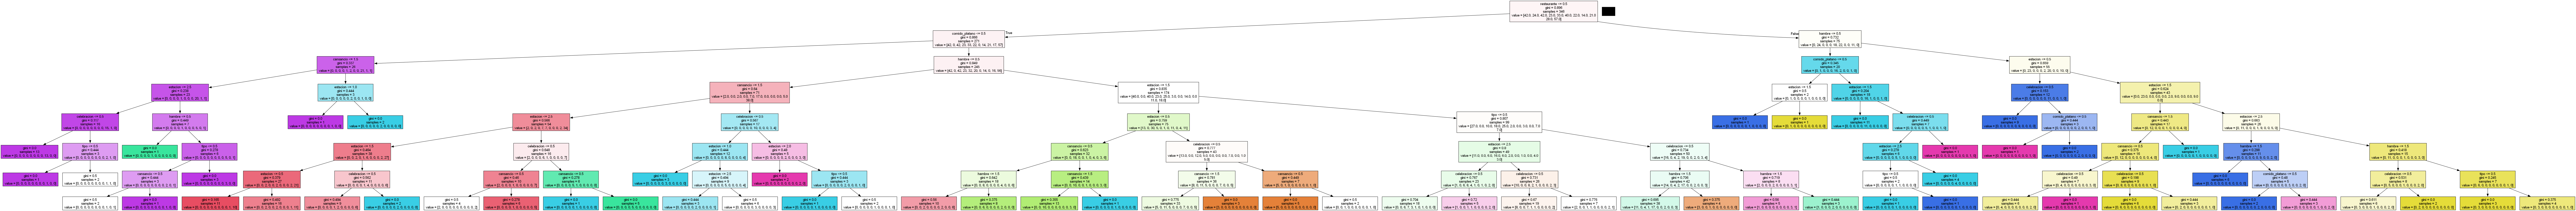

In [7]:
dot_data = StringIO()
export_graphviz(t, 
                out_file=dot_data, 
                feature_names=X_train.columns, 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [8]:
y_pred = t.predict(X_test)

comparacion = pd.DataFrame({
    'Real': enc.inverse_transform(y_test),
    'Predicho': enc.inverse_transform(y_pred)})

comparacion

,Real,Predicho
0,flan,flan
1,flan,flan
2,natillas,natillas
3,natillas,natillas
4,tarta,flan
5,tarta,tarta
6,nada,nada
7,nada,yogur
8,mini magnum,mini magnum
9,mini magnum,manzana


In [201]:
joblib.dump(t, "modelo_postres.pkl")
joblib.dump(encoders, "encoders.pkl")

['encoders.pkl']